In [8]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import  plot_acf

from ipywidgets import interact,widgets
import matplotlib

In [3]:
df=pd.read_csv(r"D:\Datasets\FRED-NROUST.csv")
df.head()

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182


## Auto Correlation


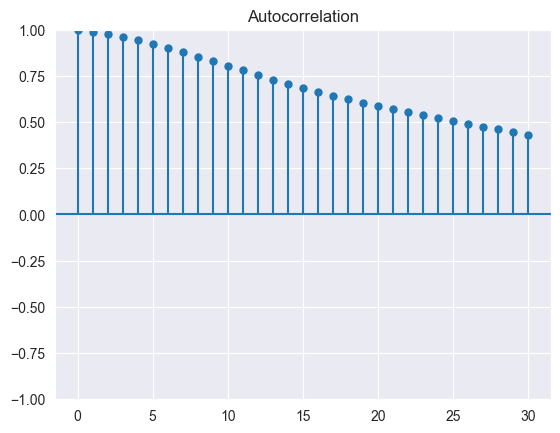

In [4]:
plot_acf(df['Value'],lags=30,alpha=None)
plt.show()

## Arima Sarima

In [5]:
y_train,y_test=df['Value'].iloc[:-8],df['Value'].iloc[-8:]
y_train.shape,y_test.shape

((288,), (8,))

In [11]:
matplotlib.use('TkAgg')
def arima(p,d,q):
    model=ARIMA(y_train,order=(p,d,q))
    model_fir=model.fit(maxiter=1000)
    pred=model.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
    y_test.plot(color='pink',label='test')
    pred.plot(color='purple',label='forcast')
    rsme=root_mean_squared_error(y_test,pred)
    plt.title(f"RMSE:{rsme:.2f}")
    plt.legend(loc='best')
    plt.show()

widgets.interact(arima,p=(0,5,1),d=(0,5,1),q=(0,5,1))


interactive(children=(IntSlider(value=2, description='p', max=5), IntSlider(value=2, description='d', max=5), …

<function __main__.arima(p, d, q)>

## hello

In [ ]:
# Cell 1: Imports and Setup
import pandas as pd
import numpy as np
import ipympl
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error # Assuming you have this function
import ipywidgets as widgets
from IPython.display import display

# Ensure the plot backend is enabled
%matplotlib inline
%matplotlib widget

# Cell 2: Define your data (Example placeholder data)
# Replace this with your actual data loading and splitting
data = pd.Series(np.random.rand(100), index=pd.to_datetime(pd.date_range('2020-01-01', periods=100)))
train_size = int(len(data) * 0.8)
y_train = data[:train_size]
y_test = data[train_size:]

# Cell 3: Your Function and Interact Call
def arima(p,d,q):
    # **Good Practice:** Always explicitly create a new figure for each iteration
    plt.figure(figsize=(10, 6))

    # (Your ARIMA model fitting and prediction logic...)
    # NOTE: ARIMA and model fitting can be computationally intensive and slow down the widget
    try:
        model=ARIMA(y_train,order=(p,d,q))
        model_fit=model.fit(maxiter=100) # Lower maxiter for faster interaction

        # NOTE: start/end should use indexes, not lengths, for robustness
        pred=model_fit.predict(start=y_train.index[-1],end=y_test.index[-1])

        # Ensure y_test and pred are aligned series for plotting and RMSE

        y_test.plot(color='pink',label='test')
        pred.plot(color='purple',label='forecast')

        # Ensure y_test and pred are aligned before calculating RMSE
        rsme=root_mean_squared_error(y_test,pred)

        plt.title(f"RMSE: {rsme:.2f} | ARIMA({p},{d},{q})")
        plt.legend(loc='best')
        plt.grid(True)
        # plt.show() is often unnecessary/problematic in interact, but it's fine here
        plt.show()

    except Exception as e:
        print(f"Error during model fitting or prediction: {e}")
        plt.close() # Close any created figure if an error occurs

# Call interact
widgets.interact(arima, p=(0,5,1), d=(0,5,1), q=(0,5,1))

interactive(children=(IntSlider(value=2, description='p', max=5), IntSlider(value=2, description='d', max=5), …

<function __main__.arima(p, d, q)>

# Anomalies Detection

### Isolation Forest

In [8]:
milk_data = pd.read_csv(r"D:\Datasets\milk.csv",index_col = 0)

In [9]:
milk_data

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [11]:
cif = IsolationForest(contamination = 0.05,random_state = 25)
cif.fit(milk_data)
predictions = cif.predict(milk_data)
dict(zip(list(milk_data.index),predictions))
#so,rabbit and seal are outliers

{'HORSE': np.int64(1),
 'ORANGUTAN': np.int64(1),
 'MONKEY': np.int64(1),
 'DONKEY': np.int64(1),
 'HIPPO': np.int64(1),
 'CAMEL': np.int64(1),
 'BISON': np.int64(1),
 'BUFFALO': np.int64(1),
 'GUINEA PIG': np.int64(1),
 'CAT': np.int64(1),
 'FOX': np.int64(1),
 'LLAMA': np.int64(1),
 'MULE': np.int64(1),
 'PIG': np.int64(1),
 'ZEBRA': np.int64(1),
 'SHEEP': np.int64(1),
 'DOG': np.int64(1),
 'ELEPHANT': np.int64(1),
 'RABBIT': np.int64(-1),
 'RAT': np.int64(1),
 'DEER': np.int64(1),
 'REINDEER': np.int64(1),
 'WHALE': np.int64(1),
 'SEAL': np.int64(-1),
 'DOLPHIN': np.int64(1)}